This bulk of this code was pulled from the following tutorial (https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33) and changes were made to fit our dataset. This code will create a Deep Neural Net model for a regression problem. 

UPDATE: Unfortunately after completion of this model, I realized that the dataset I was using meant that I was predicting players final points based on that seasons stats (with 76% accuracy that is) but not exactly what the goal was. Will update the dataset and try again.

In [4]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

We will first import our data set as a pandas dataFrame.

In [5]:
data_path = '10-years-stats.csv'
data_frame = pd.read_csv(data_path)

data_frame.describe()

,GP,TOI,G,A,P,P1,P/60,P1/60,GS,GS/60,...,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoT,CF% QoT,TOI% QoC,CF% QoC
count,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,...,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000
mean,51.306864,612.566969,6.674781,9.169792,15.844573,12.211093,1.401652,1.077713,17.452540,1.476682,...,6.475708,0.607041,8.646733,99.600958,49.799631,24.132223,29.308336,49.332470,28.725509,49.793178
std,26.334780,363.075151,5.760293,7.740948,12.677114,10.010299,0.656572,0.556603,15.997717,0.992946,...,4.575490,0.194369,5.475836,3.393577,8.928383,4.735432,1.426048,2.904691,0.747911,0.607218
min,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.440000,-2.710000,...,0.020000,0.010000,0.000000,76.190000,5.620000,6.100000,24.380000,36.750000,25.840000,45.190000
25%,25.000000,238.410000,2.000000,3.000000,5.000000,4.000000,0.980000,0.730000,3.977500,0.830000,...,2.340000,0.480000,5.420000,97.880000,44.927500,20.890000,28.260000,47.557500,28.200000,49.530000
50%,58.000000,632.130000,5.000000,7.000000,13.000000,10.000000,1.400000,1.070000,13.305000,1.520000,...,5.945000,0.590000,8.510000,99.780000,50.240000,24.680000,29.420000,49.460000,28.760000,49.830000
75%,77.000000,940.027500,10.000000,14.000000,25.000000,19.000000,1.820000,1.420000,27.942500,2.120000,...,9.800000,0.730000,11.570000,101.530000,55.172500,27.790000,30.330000,51.250000,29.310000,50.080000
max,91.000000,1454.670000,41.000000,52.000000,71.000000,59.000000,5.580000,4.140000,89.540000,5.360000,...,24.770000,1.540000,100.000000,121.660000,89.290000,37.690000,34.620000,62.830000,30.920000,55.080000


Get columns within the dataset with no NaN values.

In [6]:
def get_col_with_no_nan(df, col_type):
    ''' 
    df - dataset to be checked
    col_type - num: columns containing only numerical data
               no_num: columns not containing numerical data
               any: all columns
    '''
    
    if col_type == 'num':
        predictors = df.select_dtypes(exclude=['object'])
    elif col_type == 'no_num':
        predictors = df.select_dtypes(include=['object'])
    elif col_type == 'any':
        predictors = df
    else:
        print('Please input a correct col_type value (num, no_num, any)')
        return 0
    
    col_with_no_nan = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            col_with_no_nan.append(col)
            
    return col_with_no_nan

In [7]:
num_col = get_col_with_no_nan(data_frame, col_type='num')
no_num = get_col_with_no_nan(data_frame, col_type='no_num')

print('Number of numerical columns: ' + str(len(num_col)))
print('Number of non-numerical columns: ' + str(len(no_num)))
print(num_col)

Number of numerical columns: 37
Number of non-numerical columns: 4
['GP', 'TOI', 'G', 'A', 'P', 'P1', 'P/60', 'P1/60', 'GS', 'GS/60', 'CF', 'CA', 'C+/-', 'CF%', 'Rel CF%', 'GF', 'GA', 'G+/-', 'xGF', 'xGA', 'xG+/-', 'xGF%', 'Rel xGF%', 'iPENT', 'iPEND', 'iP+/-', 'iCF', 'iCF/60', 'ixGF', 'ixGF/60', 'PDO', 'ZSR', 'TOI%', 'TOI% QoT', 'CF% QoT', 'TOI% QoC', 'CF% QoC']


This can be validated by looking at our dataset, but we have 4 non-numerical stats at the beginning (name, year, team, position) and the rest of the stats are numerical. We only care

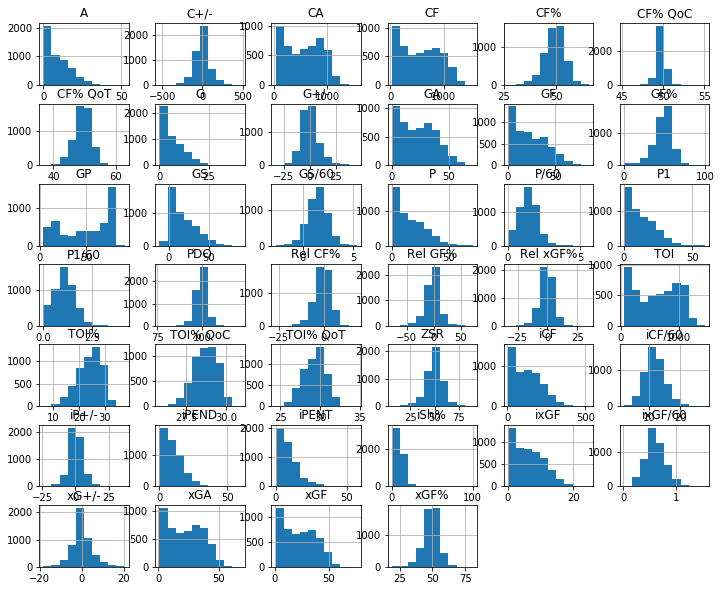

In [10]:
data_frame.hist(figsize=(12,10))
plt.show()

let's split our dataset into attributes and our target.

In [11]:
target = data_frame['P']
attributes = data_frame[num_col].drop(columns='P')

target.head()
attributes.head()


,GP,TOI,G,A,P1,P/60,P1/60,GS,GS/60,CF,...,iCF/60,ixGF,ixGF/60,PDO,ZSR,TOI%,TOI% QoT,CF% QoT,TOI% QoC,CF% QoC
0,12,170.17,0,2,1,0.71,0.35,1.05,0.37,152,...,9.52,0.24,0.08,95.93,48.24,30.23,27.19,47.39,28.80,50.52
1,19,142.23,0,2,0,0.84,0.00,1.64,0.69,127,...,10.55,0.84,0.35,97.67,48.05,16.25,26.44,44.92,28.06,50.72
2,7,65.34,0,0,0,0.00,0.00,1.17,1.07,72,...,11.02,0.54,0.50,96.55,58.06,18.74,29.44,50.29,28.08,48.46
3,10,73.27,3,0,3,2.46,2.46,3.46,2.83,64,...,13.92,1.17,0.96,103.33,35.56,14.83,26.36,48.48,27.27,48.89
4,38,282.68,1,4,2,1.06,0.42,9.94,2.11,294,...,14.65,2.24,0.48,100.21,48.46,16.21,26.56,46.86,27.63,48.95


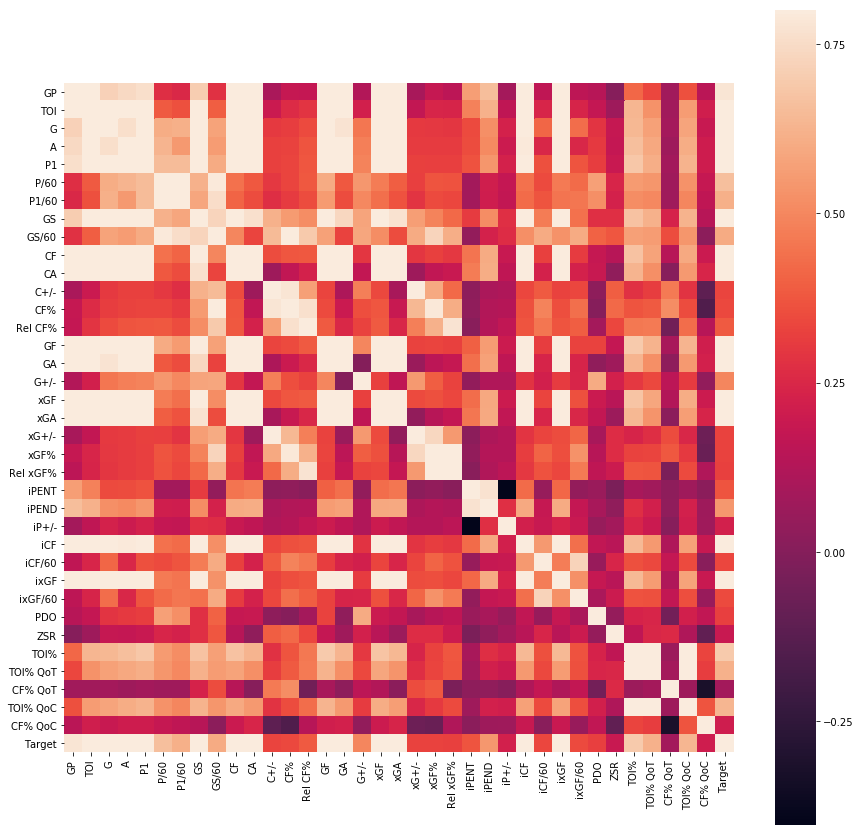

In [12]:
train_data = attributes
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize=(15,15))

sb.heatmap(C_mat, vmax=0.8, square=True)
plt.show()

From this we see that there are 20 attributes that have a fairly high correlation. I want to test the network limiting our dataset to thses attributes as well as with the all attributes

In [13]:
print(len(train_data.index))
train = train_data.sample(frac=0.8, random_state=200)
test = train_data.drop(train.index)
train_target = train['Target']
test_target = test['Target']
train = train.drop(columns='Target')
test = test.drop(columns='Target')
print(len(train.index), len((train_target.index)))
print(len(test.index), len((test_target.index)))
print(train.shape,test.shape)

test_target = test_target.reset_index()


5012
4010 4010
1002 1002
(4010, 36) (1002, 36)


We will now create the deep neural network and use the following attributes as a baseline model.

- Use a sequential model 
- Build some dense layers
- initialize using normal initializer
- relu activation function for internal layers
- mae or mse for loss function
- use linear loss function for singular output node


In [14]:
NN_model = Sequential()

#Create the input layer
NN_model.add(Dense(128, activation='relu', kernel_initializer='normal', input_dim=train.shape[1]))

#Add hidden layers
NN_model.add(Dense(256, activation='relu', kernel_initializer='normal'))
NN_model.add(Dense(256, activation='relu', kernel_initializer='normal'))
NN_model.add(Dense(256, activation='relu', kernel_initializer='normal'))

#Add output layer
NN_model.add(Dense(1, activation='linear', kernel_initializer='normal'))

NN_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error']) 
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4736      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 169,601
Trainable params: 169,601
Non-trainable params: 0
_________________________________________________________________


Now we will define a checkpoint. This is good practice for running NN with lots of attributes that take a while. 

In [15]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Now we will train the model

In [16]:
NN_model.fit(train, train_target, batch_size=32, epochs=50, validation_split=0.2, callbacks=callbacks_list)

Train on 3208 samples, validate on 802 samples
Epoch 1/50


  32/3208 [..............................] - ETA: 35s - loss: 8.8820 - mean_absolute_error: 8.8820

 224/3208 [=>............................] - ETA: 5s - loss: 6.9974 - mean_absolute_error: 6.9974 

 352/3208 [==>...........................] - ETA: 3s - loss: 6.1190 - mean_absolute_error: 6.1190

 448/3208 [===>..........................] - ETA: 3s - loss: 5.5856 - mean_absolute_error: 5.5856

 608/3208 [====>.........................] - ETA: 2s - loss: 5.3838 - mean_absolute_error: 5.3838

 928/3208 [=======>......................] - ETA: 1s - loss: 4.7891 - mean_absolute_error: 4.7891

1184/3208 [==========>...................] - ETA: 1s - loss: 4.5500 - mean_absolute_error: 4.5500

1504/3208 [=============>................] - ETA: 0s - loss: 4.3676 - mean_absolute_error: 4.3676

1696/3208 [==============>...............] - ETA: 0s - loss: 4.3051 - mean_absolute_error: 4.3051

2016/3208 [=================>............] - ETA: 0s - loss: 4.1849 - mean_absolute_error: 4.1849

2304/3208 [====================>.........] - ETA: 0s - loss: 4.1295 - mean_absolute_error: 4.1295

2560/3208 [======================>.......] - ETA: 0s - loss: 4.1062 - mean_absolute_error: 4.1062

2816/3208 [=========================>....] - ETA: 0s - loss: 3.9905 - mean_absolute_error: 3.9905

3104/3208 [============================>.] - ETA: 0s - loss: 3.8960 - mean_absolute_error: 3.8960

3208/3208 [==============================] - 1s 363us/step - loss: 3.8662 - mean_absolute_error: 3.8662 - val_loss: 2.5274 - val_mean_absolute_error: 2.5274



Epoch 00001: val_loss improved from inf to 2.52737, saving model to Weights-001--2.52737.hdf5


Epoch 2/50
  32/3208 [..............................] - ETA: 0s - loss: 2.8775 - mean_absolute_error: 2.8775

 128/3208 [>.............................] - ETA: 2s - loss: 2.8572 - mean_absolute_error: 2.8572

 416/3208 [==>...........................] - ETA: 0s - loss: 2.8249 - mean_absolute_error: 2.8249

 576/3208 [====>.........................] - ETA: 0s - loss: 2.7261 - mean_absolute_error: 2.7261

 832/3208 [======>.......................] - ETA: 0s - loss: 2.6944 - mean_absolute_error: 2.6944

1056/3208 [========>.....................] - ETA: 0s - loss: 2.6452 - mean_absolute_error: 2.6452

1216/3208 [==========>...................] - ETA: 0s - loss: 2.6573 - mean_absolute_error: 2.6573

1472/3208 [============>.................] - ETA: 0s - loss: 2.5342 - mean_absolute_error: 2.5342

1728/3208 [===============>..............] - ETA: 0s - loss: 2.4561 - mean_absolute_error: 2.4561

1984/3208 [=================>............] - ETA: 0s - loss: 2.4021 - mean_absolute_error: 2.4021

2272/3208 [====================>.........] - ETA: 0s - loss: 2.3881 - mean_absolute_error: 2.3881

2560/3208 [======================>.......] - ETA: 0s - loss: 2.3132 - mean_absolute_error: 2.3132

2848/3208 [=========================>....] - ETA: 0s - loss: 2.2364 - mean_absolute_error: 2.2364

3104/3208 [============================>.] - ETA: 0s - loss: 2.1855 - mean_absolute_error: 2.1855

3208/3208 [==============================] - 1s 242us/step - loss: 2.1727 - mean_absolute_error: 2.1727 - val_loss: 1.6777 - val_mean_absolute_error: 1.6777



Epoch 00002: val_loss improved from 2.52737 to 1.67765, saving model to Weights-002--1.67765.hdf5


Epoch 3/50
  32/3208 [..............................] - ETA: 0s - loss: 1.4058 - mean_absolute_error: 1.4058

 192/3208 [>.............................] - ETA: 0s - loss: 1.5770 - mean_absolute_error: 1.5770

 448/3208 [===>..........................] - ETA: 0s - loss: 1.6423 - mean_absolute_error: 1.6423

 704/3208 [=====>........................] - ETA: 0s - loss: 1.6475 - mean_absolute_error: 1.6475

 960/3208 [=======>......................] - ETA: 0s - loss: 1.5490 - mean_absolute_error: 1.5490

1152/3208 [=========>....................] - ETA: 0s - loss: 1.5107 - mean_absolute_error: 1.5107

1408/3208 [============>.................] - ETA: 0s - loss: 1.4554 - mean_absolute_error: 1.4554

1632/3208 [==============>...............] - ETA: 0s - loss: 1.3905 - mean_absolute_error: 1.3905

1824/3208 [================>.............] - ETA: 0s - loss: 1.3549 - mean_absolute_error: 1.3549

1984/3208 [=================>............] - ETA: 0s - loss: 1.3420 - mean_absolute_error: 1.3420

2176/3208 [===================>..........] - ETA: 0s - loss: 1.3050 - mean_absolute_error: 1.3050

2464/3208 [======================>.......] - ETA: 0s - loss: 1.2705 - mean_absolute_error: 1.2705

2720/3208 [========================>.....] - ETA: 0s - loss: 1.2625 - mean_absolute_error: 1.2625

2976/3208 [==========================>...] - ETA: 0s - loss: 1.2553 - mean_absolute_error: 1.2553

3208/3208 [==============================] - 1s 244us/step - loss: 1.2341 - mean_absolute_error: 1.2341 - val_loss: 1.0357 - val_mean_absolute_error: 1.0357



Epoch 00003: val_loss improved from 1.67765 to 1.03575, saving model to Weights-003--1.03575.hdf5


Epoch 4/50
  32/3208 [..............................] - ETA: 0s - loss: 0.9822 - mean_absolute_error: 0.9822

 256/3208 [=>............................] - ETA: 0s - loss: 1.5308 - mean_absolute_error: 1.5308

 576/3208 [====>.........................] - ETA: 0s - loss: 2.0380 - mean_absolute_error: 2.0380

 864/3208 [=======>......................] - ETA: 0s - loss: 2.0138 - mean_absolute_error: 2.0138

1184/3208 [==========>...................] - ETA: 0s - loss: 1.8613 - mean_absolute_error: 1.8613

1344/3208 [===========>..................] - ETA: 0s - loss: 1.8078 - mean_absolute_error: 1.8078

1568/3208 [=============>................] - ETA: 0s - loss: 1.7625 - mean_absolute_error: 1.7625

1760/3208 [===============>..............] - ETA: 0s - loss: 1.6855 - mean_absolute_error: 1.6855

2016/3208 [=================>............] - ETA: 0s - loss: 1.6051 - mean_absolute_error: 1.6051

2272/3208 [====================>.........] - ETA: 0s - loss: 1.5545 - mean_absolute_error: 1.5545

2496/3208 [======================>.......] - ETA: 0s - loss: 1.5075 - mean_absolute_error: 1.5075

2752/3208 [========================>.....] - ETA: 0s - loss: 1.4483 - mean_absolute_error: 1.4483

3040/3208 [===========================>..] - ETA: 0s - loss: 1.3888 - mean_absolute_error: 1.3888

3208/3208 [==============================] - 1s 220us/step - loss: 1.3589 - mean_absolute_error: 1.3589 - val_loss: 1.0120 - val_mean_absolute_error: 1.0120



Epoch 00004: val_loss improved from 1.03575 to 1.01203, saving model to Weights-004--1.01203.hdf5


Epoch 5/50
  32/3208 [..............................] - ETA: 0s - loss: 0.8804 - mean_absolute_error: 0.8804

 192/3208 [>.............................] - ETA: 0s - loss: 0.8181 - mean_absolute_error: 0.8181

 320/3208 [=>............................] - ETA: 1s - loss: 0.9844 - mean_absolute_error: 0.9844

 512/3208 [===>..........................] - ETA: 0s - loss: 1.0682 - mean_absolute_error: 1.0682

 736/3208 [=====>........................] - ETA: 0s - loss: 1.1205 - mean_absolute_error: 1.1205

 992/3208 [========>.....................] - ETA: 0s - loss: 1.1592 - mean_absolute_error: 1.1592

1312/3208 [===========>..................] - ETA: 0s - loss: 1.0913 - mean_absolute_error: 1.0913

1600/3208 [=============>................] - ETA: 0s - loss: 1.0398 - mean_absolute_error: 1.0398

1696/3208 [==============>...............] - ETA: 0s - loss: 1.0224 - mean_absolute_error: 1.0224

1920/3208 [================>.............] - ETA: 0s - loss: 1.0330 - mean_absolute_error: 1.0330

2208/3208 [===================>..........] - ETA: 0s - loss: 0.9998 - mean_absolute_error: 0.9998

2560/3208 [======================>.......] - ETA: 0s - loss: 0.9811 - mean_absolute_error: 0.9811

2880/3208 [=========================>....] - ETA: 0s - loss: 1.0271 - mean_absolute_error: 1.0271

3168/3208 [============================>.] - ETA: 0s - loss: 1.0891 - mean_absolute_error: 1.0891

3208/3208 [==============================] - 1s 235us/step - loss: 1.0921 - mean_absolute_error: 1.0921 - val_loss: 1.5879 - val_mean_absolute_error: 1.5879



Epoch 00005: val_loss did not improve from 1.01203
Epoch 6/50
  32/3208 [..............................] - ETA: 0s - loss: 1.6407 - mean_absolute_error: 1.6407

 160/3208 [>.............................] - ETA: 1s - loss: 1.1352 - mean_absolute_error: 1.1352

 480/3208 [===>..........................] - ETA: 0s - loss: 0.9472 - mean_absolute_error: 0.9472

 800/3208 [======>.......................] - ETA: 0s - loss: 0.9597 - mean_absolute_error: 0.9597

1120/3208 [=========>....................] - ETA: 0s - loss: 0.9694 - mean_absolute_error: 0.9694

1472/3208 [============>.................] - ETA: 0s - loss: 0.9475 - mean_absolute_error: 0.9475

1696/3208 [==============>...............] - ETA: 0s - loss: 0.9109 - mean_absolute_error: 0.9109

2048/3208 [==================>...........] - ETA: 0s - loss: 0.8885 - mean_absolute_error: 0.8885

2208/3208 [===================>..........] - ETA: 0s - loss: 0.8837 - mean_absolute_error: 0.8837

2496/3208 [======================>.......] - ETA: 0s - loss: 0.8708 - mean_absolute_error: 0.8708

2752/3208 [========================>.....] - ETA: 0s - loss: 0.9171 - mean_absolute_error: 0.9171

3104/3208 [============================>.] - ETA: 0s - loss: 0.9732 - mean_absolute_error: 0.9732

3208/3208 [==============================] - 1s 208us/step - loss: 0.9768 - mean_absolute_error: 0.9768 - val_loss: 0.8564 - val_mean_absolute_error: 0.8564



Epoch 00006: val_loss improved from 1.01203 to 0.85638, saving model to Weights-006--0.85638.hdf5


Epoch 7/50
  32/3208 [..............................] - ETA: 0s - loss: 0.7853 - mean_absolute_error: 0.7853

 256/3208 [=>............................] - ETA: 0s - loss: 0.9749 - mean_absolute_error: 0.9749

 608/3208 [====>.........................] - ETA: 0s - loss: 0.8632 - mean_absolute_error: 0.8632

 960/3208 [=======>......................] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.8425

1184/3208 [==========>...................] - ETA: 0s - loss: 0.8279 - mean_absolute_error: 0.8279

1408/3208 [============>.................] - ETA: 0s - loss: 0.8142 - mean_absolute_error: 0.8142

1632/3208 [==============>...............] - ETA: 0s - loss: 0.8073 - mean_absolute_error: 0.8073

1888/3208 [================>.............] - ETA: 0s - loss: 0.8121 - mean_absolute_error: 0.8121

2176/3208 [===================>..........] - ETA: 0s - loss: 0.8485 - mean_absolute_error: 0.8485

2400/3208 [=====================>........] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.8450

2624/3208 [=======================>......] - ETA: 0s - loss: 0.8710 - mean_absolute_error: 0.8710

2880/3208 [=========================>....] - ETA: 0s - loss: 0.8557 - mean_absolute_error: 0.8557

3072/3208 [===========================>..] - ETA: 0s - loss: 0.8537 - mean_absolute_error: 0.8537

3208/3208 [==============================] - 1s 220us/step - loss: 0.8498 - mean_absolute_error: 0.8498 - val_loss: 1.0603 - val_mean_absolute_error: 1.0603



Epoch 00007: val_loss did not improve from 0.85638
Epoch 8/50
  32/3208 [..............................] - ETA: 0s - loss: 1.2541 - mean_absolute_error: 1.2541

 224/3208 [=>............................] - ETA: 0s - loss: 0.9390 - mean_absolute_error: 0.9390

 384/3208 [==>...........................] - ETA: 0s - loss: 1.0421 - mean_absolute_error: 1.0421

 512/3208 [===>..........................] - ETA: 0s - loss: 1.0626 - mean_absolute_error: 1.0626

 768/3208 [======>.......................] - ETA: 0s - loss: 1.0422 - mean_absolute_error: 1.0422

 992/3208 [========>.....................] - ETA: 0s - loss: 0.9830 - mean_absolute_error: 0.9830

1248/3208 [==========>...................] - ETA: 0s - loss: 0.9187 - mean_absolute_error: 0.9187

1568/3208 [=============>................] - ETA: 0s - loss: 0.9002 - mean_absolute_error: 0.9002

1856/3208 [================>.............] - ETA: 0s - loss: 0.9229 - mean_absolute_error: 0.9229

2208/3208 [===================>..........] - ETA: 0s - loss: 0.9035 - mean_absolute_error: 0.9035

2560/3208 [======================>.......] - ETA: 0s - loss: 0.8804 - mean_absolute_error: 0.8804

2816/3208 [=========================>....] - ETA: 0s - loss: 0.8586 - mean_absolute_error: 0.8586

3104/3208 [============================>.] - ETA: 0s - loss: 0.8568 - mean_absolute_error: 0.8568

3208/3208 [==============================] - 1s 220us/step - loss: 0.8587 - mean_absolute_error: 0.8587 - val_loss: 0.6082 - val_mean_absolute_error: 0.6082



Epoch 00008: val_loss improved from 0.85638 to 0.60819, saving model to Weights-008--0.60819.hdf5


Epoch 9/50
  32/3208 [..............................] - ETA: 0s - loss: 0.6310 - mean_absolute_error: 0.6310

 224/3208 [=>............................] - ETA: 0s - loss: 0.6222 - mean_absolute_error: 0.6222

 416/3208 [==>...........................] - ETA: 0s - loss: 0.6167 - mean_absolute_error: 0.6167

 672/3208 [=====>........................] - ETA: 0s - loss: 0.6775 - mean_absolute_error: 0.6775

1024/3208 [========>.....................] - ETA: 0s - loss: 0.6834 - mean_absolute_error: 0.6834

1280/3208 [==========>...................] - ETA: 0s - loss: 0.6833 - mean_absolute_error: 0.6833

1504/3208 [=============>................] - ETA: 0s - loss: 0.6696 - mean_absolute_error: 0.6696

1728/3208 [===============>..............] - ETA: 0s - loss: 0.6754 - mean_absolute_error: 0.6754

2016/3208 [=================>............] - ETA: 0s - loss: 0.7279 - mean_absolute_error: 0.7279

2304/3208 [====================>.........] - ETA: 0s - loss: 0.7434 - mean_absolute_error: 0.7434

2592/3208 [=======================>......] - ETA: 0s - loss: 0.7985 - mean_absolute_error: 0.7985

2848/3208 [=========================>....] - ETA: 0s - loss: 0.8265 - mean_absolute_error: 0.8265

3104/3208 [============================>.] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.8424

3208/3208 [==============================] - 1s 219us/step - loss: 0.8392 - mean_absolute_error: 0.8392 - val_loss: 0.5657 - val_mean_absolute_error: 0.5657



Epoch 00009: val_loss improved from 0.60819 to 0.56566, saving model to Weights-009--0.56566.hdf5


Epoch 10/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4808 - mean_absolute_error: 0.4808

 320/3208 [=>............................] - ETA: 0s - loss: 0.7514 - mean_absolute_error: 0.7514

 672/3208 [=====>........................] - ETA: 0s - loss: 0.8614 - mean_absolute_error: 0.8614

 992/3208 [========>.....................] - ETA: 0s - loss: 0.8035 - mean_absolute_error: 0.8035

1184/3208 [==========>...................] - ETA: 0s - loss: 0.7921 - mean_absolute_error: 0.7921

1376/3208 [===========>..................] - ETA: 0s - loss: 0.7720 - mean_absolute_error: 0.7720

1600/3208 [=============>................] - ETA: 0s - loss: 0.7976 - mean_absolute_error: 0.7976

1824/3208 [================>.............] - ETA: 0s - loss: 0.8256 - mean_absolute_error: 0.8256

2048/3208 [==================>...........] - ETA: 0s - loss: 0.8285 - mean_absolute_error: 0.8285

2208/3208 [===================>..........] - ETA: 0s - loss: 0.8176 - mean_absolute_error: 0.8176

2368/3208 [=====================>........] - ETA: 0s - loss: 0.8056 - mean_absolute_error: 0.8056

2560/3208 [======================>.......] - ETA: 0s - loss: 0.8130 - mean_absolute_error: 0.8130

2752/3208 [========================>.....] - ETA: 0s - loss: 0.8162 - mean_absolute_error: 0.8162

3008/3208 [===========================>..] - ETA: 0s - loss: 0.8040 - mean_absolute_error: 0.8040

3208/3208 [==============================] - 1s 244us/step - loss: 0.7942 - mean_absolute_error: 0.7942 - val_loss: 0.6166 - val_mean_absolute_error: 0.6166



Epoch 00010: val_loss did not improve from 0.56566
Epoch 11/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5361 - mean_absolute_error: 0.5361

 224/3208 [=>............................] - ETA: 0s - loss: 0.5842 - mean_absolute_error: 0.5842

 416/3208 [==>...........................] - ETA: 0s - loss: 0.6310 - mean_absolute_error: 0.6310

 672/3208 [=====>........................] - ETA: 0s - loss: 0.6335 - mean_absolute_error: 0.6335

 992/3208 [========>.....................] - ETA: 0s - loss: 0.6438 - mean_absolute_error: 0.6438

1312/3208 [===========>..................] - ETA: 0s - loss: 0.6526 - mean_absolute_error: 0.6526

1568/3208 [=============>................] - ETA: 0s - loss: 0.6693 - mean_absolute_error: 0.6693

1856/3208 [================>.............] - ETA: 0s - loss: 0.6559 - mean_absolute_error: 0.6559

2144/3208 [===================>..........] - ETA: 0s - loss: 0.6642 - mean_absolute_error: 0.6642

2304/3208 [====================>.........] - ETA: 0s - loss: 0.6933 - mean_absolute_error: 0.6933

2592/3208 [=======================>......] - ETA: 0s - loss: 0.7116 - mean_absolute_error: 0.7116

2912/3208 [==========================>...] - ETA: 0s - loss: 0.7069 - mean_absolute_error: 0.7069

3136/3208 [============================>.] - ETA: 0s - loss: 0.7451 - mean_absolute_error: 0.7451

3208/3208 [==============================] - 1s 214us/step - loss: 0.7551 - mean_absolute_error: 0.7551 - val_loss: 1.3384 - val_mean_absolute_error: 1.3384



Epoch 00011: val_loss did not improve from 0.56566
Epoch 12/50
  32/3208 [..............................] - ETA: 0s - loss: 1.4911 - mean_absolute_error: 1.4911

 192/3208 [>.............................] - ETA: 1s - loss: 1.1890 - mean_absolute_error: 1.1890

 384/3208 [==>...........................] - ETA: 0s - loss: 0.9926 - mean_absolute_error: 0.9926

 736/3208 [=====>........................] - ETA: 0s - loss: 0.8805 - mean_absolute_error: 0.8805

 992/3208 [========>.....................] - ETA: 0s - loss: 0.8603 - mean_absolute_error: 0.8603

1312/3208 [===========>..................] - ETA: 0s - loss: 0.9058 - mean_absolute_error: 0.9058

1600/3208 [=============>................] - ETA: 0s - loss: 0.8820 - mean_absolute_error: 0.8820

1952/3208 [=================>............] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.8390

2304/3208 [====================>.........] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.8398

2560/3208 [======================>.......] - ETA: 0s - loss: 0.8730 - mean_absolute_error: 0.8730

2848/3208 [=========================>....] - ETA: 0s - loss: 0.9259 - mean_absolute_error: 0.9259

3136/3208 [============================>.] - ETA: 0s - loss: 0.9237 - mean_absolute_error: 0.9237

3208/3208 [==============================] - 1s 197us/step - loss: 0.9209 - mean_absolute_error: 0.9209 - val_loss: 0.5677 - val_mean_absolute_error: 0.5677



Epoch 00012: val_loss did not improve from 0.56566
Epoch 13/50


  32/3208 [..............................] - ETA: 0s - loss: 0.6009 - mean_absolute_error: 0.6009

 224/3208 [=>............................] - ETA: 0s - loss: 0.6313 - mean_absolute_error: 0.6313

 384/3208 [==>...........................] - ETA: 0s - loss: 0.7004 - mean_absolute_error: 0.7004

 512/3208 [===>..........................] - ETA: 0s - loss: 0.7253 - mean_absolute_error: 0.7253

 768/3208 [======>.......................] - ETA: 0s - loss: 0.6705 - mean_absolute_error: 0.6705

1120/3208 [=========>....................] - ETA: 0s - loss: 0.6536 - mean_absolute_error: 0.6536

1472/3208 [============>.................] - ETA: 0s - loss: 0.6799 - mean_absolute_error: 0.6799

1824/3208 [================>.............] - ETA: 0s - loss: 0.6592 - mean_absolute_error: 0.6592

2048/3208 [==================>...........] - ETA: 0s - loss: 0.6537 - mean_absolute_error: 0.6537

2368/3208 [=====================>........] - ETA: 0s - loss: 0.6508 - mean_absolute_error: 0.6508

2720/3208 [========================>.....] - ETA: 0s - loss: 0.7066 - mean_absolute_error: 0.7066

3040/3208 [===========================>..] - ETA: 0s - loss: 0.7370 - mean_absolute_error: 0.7370

3208/3208 [==============================] - 1s 201us/step - loss: 0.7305 - mean_absolute_error: 0.7305 - val_loss: 0.6896 - val_mean_absolute_error: 0.6896



Epoch 00013: val_loss did not improve from 0.56566
Epoch 14/50
  32/3208 [..............................] - ETA: 0s - loss: 0.6268 - mean_absolute_error: 0.6268

 224/3208 [=>............................] - ETA: 0s - loss: 0.7080 - mean_absolute_error: 0.7080

 448/3208 [===>..........................] - ETA: 0s - loss: 0.6596 - mean_absolute_error: 0.6596

 800/3208 [======>.......................] - ETA: 0s - loss: 0.7785 - mean_absolute_error: 0.7785

1152/3208 [=========>....................] - ETA: 0s - loss: 0.7371 - mean_absolute_error: 0.7371

1504/3208 [=============>................] - ETA: 0s - loss: 0.7243 - mean_absolute_error: 0.7243

1824/3208 [================>.............] - ETA: 0s - loss: 0.7544 - mean_absolute_error: 0.7544

2208/3208 [===================>..........] - ETA: 0s - loss: 0.7627 - mean_absolute_error: 0.7627

2496/3208 [======================>.......] - ETA: 0s - loss: 0.7511 - mean_absolute_error: 0.7511

2816/3208 [=========================>....] - ETA: 0s - loss: 0.7389 - mean_absolute_error: 0.7389

3040/3208 [===========================>..] - ETA: 0s - loss: 0.7317 - mean_absolute_error: 0.7317

3208/3208 [==============================] - 1s 191us/step - loss: 0.7224 - mean_absolute_error: 0.7224 - val_loss: 0.7028 - val_mean_absolute_error: 0.7028



Epoch 00014: val_loss did not improve from 0.56566
Epoch 15/50
  32/3208 [..............................] - ETA: 0s - loss: 0.6000 - mean_absolute_error: 0.6000

 192/3208 [>.............................] - ETA: 0s - loss: 0.6310 - mean_absolute_error: 0.6310

 384/3208 [==>...........................] - ETA: 0s - loss: 0.6958 - mean_absolute_error: 0.6958

 544/3208 [====>.........................] - ETA: 0s - loss: 0.6459 - mean_absolute_error: 0.6459

 864/3208 [=======>......................] - ETA: 0s - loss: 0.6078 - mean_absolute_error: 0.6078

1184/3208 [==========>...................] - ETA: 0s - loss: 0.6362 - mean_absolute_error: 0.6362

1536/3208 [=============>................] - ETA: 0s - loss: 0.6634 - mean_absolute_error: 0.6634

1824/3208 [================>.............] - ETA: 0s - loss: 0.6409 - mean_absolute_error: 0.6409

2112/3208 [==================>...........] - ETA: 0s - loss: 0.6369 - mean_absolute_error: 0.6369

2400/3208 [=====================>........] - ETA: 0s - loss: 0.6277 - mean_absolute_error: 0.6277

2656/3208 [=======================>......] - ETA: 0s - loss: 0.6538 - mean_absolute_error: 0.6538

2912/3208 [==========================>...] - ETA: 0s - loss: 0.6606 - mean_absolute_error: 0.6606

3200/3208 [============================>.] - ETA: 0s - loss: 0.6624 - mean_absolute_error: 0.6624

3208/3208 [==============================] - 1s 214us/step - loss: 0.6631 - mean_absolute_error: 0.6631 - val_loss: 0.9723 - val_mean_absolute_error: 0.9723



Epoch 00015: val_loss did not improve from 0.56566
Epoch 16/50
  32/3208 [..............................] - ETA: 0s - loss: 0.9805 - mean_absolute_error: 0.9805

 160/3208 [>.............................] - ETA: 1s - loss: 1.0954 - mean_absolute_error: 1.0954

 320/3208 [=>............................] - ETA: 1s - loss: 1.0063 - mean_absolute_error: 1.0063

 512/3208 [===>..........................] - ETA: 0s - loss: 0.9678 - mean_absolute_error: 0.9678

 768/3208 [======>.......................] - ETA: 0s - loss: 0.9588 - mean_absolute_error: 0.9588

 960/3208 [=======>......................] - ETA: 0s - loss: 0.8790 - mean_absolute_error: 0.8790

1184/3208 [==========>...................] - ETA: 0s - loss: 0.8269 - mean_absolute_error: 0.8269

1472/3208 [============>.................] - ETA: 0s - loss: 0.8251 - mean_absolute_error: 0.8251

1728/3208 [===============>..............] - ETA: 0s - loss: 0.7964 - mean_absolute_error: 0.7964

1984/3208 [=================>............] - ETA: 0s - loss: 0.7675 - mean_absolute_error: 0.7675

2208/3208 [===================>..........] - ETA: 0s - loss: 0.7733 - mean_absolute_error: 0.7733

2464/3208 [======================>.......] - ETA: 0s - loss: 0.7652 - mean_absolute_error: 0.7652

2720/3208 [========================>.....] - ETA: 0s - loss: 0.7469 - mean_absolute_error: 0.7469

2976/3208 [==========================>...] - ETA: 0s - loss: 0.7291 - mean_absolute_error: 0.7291

3208/3208 [==============================] - 1s 243us/step - loss: 0.7253 - mean_absolute_error: 0.7253 - val_loss: 0.5240 - val_mean_absolute_error: 0.5240



Epoch 00016: val_loss improved from 0.56566 to 0.52398, saving model to Weights-016--0.52398.hdf5


Epoch 17/50
  32/3208 [..............................] - ETA: 0s - loss: 0.3568 - mean_absolute_error: 0.3568

 256/3208 [=>............................] - ETA: 0s - loss: 0.5053 - mean_absolute_error: 0.5053

 480/3208 [===>..........................] - ETA: 0s - loss: 0.5226 - mean_absolute_error: 0.5226

 672/3208 [=====>........................] - ETA: 0s - loss: 0.5320 - mean_absolute_error: 0.5320

 960/3208 [=======>......................] - ETA: 0s - loss: 0.5842 - mean_absolute_error: 0.5842

1216/3208 [==========>...................] - ETA: 0s - loss: 0.5923 - mean_absolute_error: 0.5923

1472/3208 [============>.................] - ETA: 0s - loss: 0.6196 - mean_absolute_error: 0.6196

1728/3208 [===============>..............] - ETA: 0s - loss: 0.6173 - mean_absolute_error: 0.6173

1920/3208 [================>.............] - ETA: 0s - loss: 0.6298 - mean_absolute_error: 0.6298

2144/3208 [===================>..........] - ETA: 0s - loss: 0.6296 - mean_absolute_error: 0.6296

2432/3208 [=====================>........] - ETA: 0s - loss: 0.6424 - mean_absolute_error: 0.6424

2688/3208 [========================>.....] - ETA: 0s - loss: 0.6310 - mean_absolute_error: 0.6310

2944/3208 [==========================>...] - ETA: 0s - loss: 0.6193 - mean_absolute_error: 0.6193

3208/3208 [==============================] - 1s 228us/step - loss: 0.6089 - mean_absolute_error: 0.6089 - val_loss: 0.4470 - val_mean_absolute_error: 0.4470



Epoch 00017: val_loss improved from 0.52398 to 0.44697, saving model to Weights-017--0.44697.hdf5


Epoch 18/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4415 - mean_absolute_error: 0.4415

 288/3208 [=>............................] - ETA: 0s - loss: 0.5191 - mean_absolute_error: 0.5191

 640/3208 [====>.........................] - ETA: 0s - loss: 0.4778 - mean_absolute_error: 0.4778

 992/3208 [========>.....................] - ETA: 0s - loss: 0.5471 - mean_absolute_error: 0.5471

1344/3208 [===========>..................] - ETA: 0s - loss: 0.5578 - mean_absolute_error: 0.5578

1664/3208 [==============>...............] - ETA: 0s - loss: 0.5634 - mean_absolute_error: 0.5634

1920/3208 [================>.............] - ETA: 0s - loss: 0.5727 - mean_absolute_error: 0.5727

2240/3208 [===================>..........] - ETA: 0s - loss: 0.5873 - mean_absolute_error: 0.5873

2560/3208 [======================>.......] - ETA: 0s - loss: 0.6203 - mean_absolute_error: 0.6203

2816/3208 [=========================>....] - ETA: 0s - loss: 0.6148 - mean_absolute_error: 0.6148

3072/3208 [===========================>..] - ETA: 0s - loss: 0.6232 - mean_absolute_error: 0.6232

3208/3208 [==============================] - 1s 180us/step - loss: 0.6274 - mean_absolute_error: 0.6274 - val_loss: 0.5010 - val_mean_absolute_error: 0.5010



Epoch 00018: val_loss did not improve from 0.44697
Epoch 19/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5211 - mean_absolute_error: 0.5211

 256/3208 [=>............................] - ETA: 0s - loss: 0.6546 - mean_absolute_error: 0.6546

 448/3208 [===>..........................] - ETA: 0s - loss: 0.5752 - mean_absolute_error: 0.5752

 672/3208 [=====>........................] - ETA: 0s - loss: 0.5493 - mean_absolute_error: 0.5493

 928/3208 [=======>......................] - ETA: 0s - loss: 0.5482 - mean_absolute_error: 0.5482

1184/3208 [==========>...................] - ETA: 0s - loss: 0.5374 - mean_absolute_error: 0.5374

1440/3208 [============>.................] - ETA: 0s - loss: 0.5327 - mean_absolute_error: 0.5327

1696/3208 [==============>...............] - ETA: 0s - loss: 0.5424 - mean_absolute_error: 0.5424

1952/3208 [=================>............] - ETA: 0s - loss: 0.5473 - mean_absolute_error: 0.5473

2176/3208 [===================>..........] - ETA: 0s - loss: 0.5517 - mean_absolute_error: 0.5517

2464/3208 [======================>.......] - ETA: 0s - loss: 0.5611 - mean_absolute_error: 0.5611

2752/3208 [========================>.....] - ETA: 0s - loss: 0.5560 - mean_absolute_error: 0.5560

3040/3208 [===========================>..] - ETA: 0s - loss: 0.5720 - mean_absolute_error: 0.5720

3208/3208 [==============================] - 1s 218us/step - loss: 0.5744 - mean_absolute_error: 0.5744 - val_loss: 1.2365 - val_mean_absolute_error: 1.2365



Epoch 00019: val_loss did not improve from 0.44697
Epoch 20/50
  32/3208 [..............................] - ETA: 0s - loss: 1.6457 - mean_absolute_error: 1.6457

 288/3208 [=>............................] - ETA: 0s - loss: 1.4355 - mean_absolute_error: 1.4355

 512/3208 [===>..........................] - ETA: 0s - loss: 1.3670 - mean_absolute_error: 1.3670

 800/3208 [======>.......................] - ETA: 0s - loss: 1.2249 - mean_absolute_error: 1.2249

1120/3208 [=========>....................] - ETA: 0s - loss: 1.0761 - mean_absolute_error: 1.0761

1440/3208 [============>.................] - ETA: 0s - loss: 0.9659 - mean_absolute_error: 0.9659

1792/3208 [===============>..............] - ETA: 0s - loss: 0.8666 - mean_absolute_error: 0.8666

2144/3208 [===================>..........] - ETA: 0s - loss: 0.8177 - mean_absolute_error: 0.8177

2336/3208 [====================>.........] - ETA: 0s - loss: 0.8163 - mean_absolute_error: 0.8163

2560/3208 [======================>.......] - ETA: 0s - loss: 0.8075 - mean_absolute_error: 0.8075

2784/3208 [=========================>....] - ETA: 0s - loss: 0.8086 - mean_absolute_error: 0.8086

3040/3208 [===========================>..] - ETA: 0s - loss: 0.7939 - mean_absolute_error: 0.7939

3208/3208 [==============================] - 1s 223us/step - loss: 0.7915 - mean_absolute_error: 0.7915 - val_loss: 0.4284 - val_mean_absolute_error: 0.4284



Epoch 00020: val_loss improved from 0.44697 to 0.42841, saving model to Weights-020--0.42841.hdf5


Epoch 21/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5189 - mean_absolute_error: 0.5189

 288/3208 [=>............................] - ETA: 0s - loss: 0.5662 - mean_absolute_error: 0.5662

 640/3208 [====>.........................] - ETA: 0s - loss: 0.7170 - mean_absolute_error: 0.7170

 928/3208 [=======>......................] - ETA: 0s - loss: 0.7381 - mean_absolute_error: 0.7381

1248/3208 [==========>...................] - ETA: 0s - loss: 0.7250 - mean_absolute_error: 0.7250

1472/3208 [============>.................] - ETA: 0s - loss: 0.6925 - mean_absolute_error: 0.6925

1728/3208 [===============>..............] - ETA: 0s - loss: 0.6937 - mean_absolute_error: 0.6937

1984/3208 [=================>............] - ETA: 0s - loss: 0.7231 - mean_absolute_error: 0.7231

2272/3208 [====================>.........] - ETA: 0s - loss: 0.7093 - mean_absolute_error: 0.7093

2624/3208 [=======================>......] - ETA: 0s - loss: 0.7071 - mean_absolute_error: 0.7071

2976/3208 [==========================>...] - ETA: 0s - loss: 0.6976 - mean_absolute_error: 0.6976

3208/3208 [==============================] - 1s 184us/step - loss: 0.6958 - mean_absolute_error: 0.6958 - val_loss: 0.9107 - val_mean_absolute_error: 0.9107



Epoch 00021: val_loss did not improve from 0.42841
Epoch 22/50
  32/3208 [..............................] - ETA: 1s - loss: 1.0312 - mean_absolute_error: 1.0312

 256/3208 [=>............................] - ETA: 0s - loss: 0.7418 - mean_absolute_error: 0.7418

 416/3208 [==>...........................] - ETA: 0s - loss: 0.8875 - mean_absolute_error: 0.8875

 672/3208 [=====>........................] - ETA: 0s - loss: 0.8805 - mean_absolute_error: 0.8805

 896/3208 [=======>......................] - ETA: 0s - loss: 0.8537 - mean_absolute_error: 0.8537

1120/3208 [=========>....................] - ETA: 0s - loss: 0.8606 - mean_absolute_error: 0.8606

1376/3208 [===========>..................] - ETA: 0s - loss: 0.8361 - mean_absolute_error: 0.8361

1696/3208 [==============>...............] - ETA: 0s - loss: 0.7871 - mean_absolute_error: 0.7871

2048/3208 [==================>...........] - ETA: 0s - loss: 0.7331 - mean_absolute_error: 0.7331

2336/3208 [====================>.........] - ETA: 0s - loss: 0.7032 - mean_absolute_error: 0.7032

2688/3208 [========================>.....] - ETA: 0s - loss: 0.7075 - mean_absolute_error: 0.7075

3008/3208 [===========================>..] - ETA: 0s - loss: 0.7150 - mean_absolute_error: 0.7150

3208/3208 [==============================] - 1s 207us/step - loss: 0.7070 - mean_absolute_error: 0.7070 - val_loss: 1.3067 - val_mean_absolute_error: 1.3067



Epoch 00022: val_loss did not improve from 0.42841
Epoch 23/50
  32/3208 [..............................] - ETA: 0s - loss: 1.2632 - mean_absolute_error: 1.2632

 352/3208 [==>...........................] - ETA: 0s - loss: 0.8573 - mean_absolute_error: 0.8573

 512/3208 [===>..........................] - ETA: 0s - loss: 0.9373 - mean_absolute_error: 0.9373

 768/3208 [======>.......................] - ETA: 0s - loss: 0.8623 - mean_absolute_error: 0.8623

1024/3208 [========>.....................] - ETA: 0s - loss: 0.7777 - mean_absolute_error: 0.7777

1344/3208 [===========>..................] - ETA: 0s - loss: 0.7221 - mean_absolute_error: 0.7221

1568/3208 [=============>................] - ETA: 0s - loss: 0.6914 - mean_absolute_error: 0.6914

1728/3208 [===============>..............] - ETA: 0s - loss: 0.6936 - mean_absolute_error: 0.6936

1952/3208 [=================>............] - ETA: 0s - loss: 0.7293 - mean_absolute_error: 0.7293

2144/3208 [===================>..........] - ETA: 0s - loss: 0.7345 - mean_absolute_error: 0.7345

2368/3208 [=====================>........] - ETA: 0s - loss: 0.7317 - mean_absolute_error: 0.7317

2656/3208 [=======================>......] - ETA: 0s - loss: 0.7470 - mean_absolute_error: 0.7470

2880/3208 [=========================>....] - ETA: 0s - loss: 0.7465 - mean_absolute_error: 0.7465

3072/3208 [===========================>..] - ETA: 0s - loss: 0.7322 - mean_absolute_error: 0.7322

3208/3208 [==============================] - 1s 238us/step - loss: 0.7236 - mean_absolute_error: 0.7236 - val_loss: 0.4140 - val_mean_absolute_error: 0.4140



Epoch 00023: val_loss improved from 0.42841 to 0.41402, saving model to Weights-023--0.41402.hdf5


Epoch 24/50
  32/3208 [..............................] - ETA: 0s - loss: 0.3338 - mean_absolute_error: 0.3338

 288/3208 [=>............................] - ETA: 0s - loss: 0.5119 - mean_absolute_error: 0.5119

 544/3208 [====>.........................] - ETA: 0s - loss: 0.6321 - mean_absolute_error: 0.6321

 864/3208 [=======>......................] - ETA: 0s - loss: 0.6370 - mean_absolute_error: 0.6370

1152/3208 [=========>....................] - ETA: 0s - loss: 0.6297 - mean_absolute_error: 0.6297

1472/3208 [============>.................] - ETA: 0s - loss: 0.5938 - mean_absolute_error: 0.5938

1824/3208 [================>.............] - ETA: 0s - loss: 0.5678 - mean_absolute_error: 0.5678

2112/3208 [==================>...........] - ETA: 0s - loss: 0.5473 - mean_absolute_error: 0.5473

2368/3208 [=====================>........] - ETA: 0s - loss: 0.5356 - mean_absolute_error: 0.5356

2560/3208 [======================>.......] - ETA: 0s - loss: 0.5267 - mean_absolute_error: 0.5267

2784/3208 [=========================>....] - ETA: 0s - loss: 0.5209 - mean_absolute_error: 0.5209

3072/3208 [===========================>..] - ETA: 0s - loss: 0.5205 - mean_absolute_error: 0.5205

3208/3208 [==============================] - 1s 204us/step - loss: 0.5253 - mean_absolute_error: 0.5253 - val_loss: 0.5472 - val_mean_absolute_error: 0.5472



Epoch 00024: val_loss did not improve from 0.41402
Epoch 25/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5668 - mean_absolute_error: 0.5668

 320/3208 [=>............................] - ETA: 0s - loss: 0.5132 - mean_absolute_error: 0.5132

 576/3208 [====>.........................] - ETA: 0s - loss: 0.4876 - mean_absolute_error: 0.4876

 768/3208 [======>.......................] - ETA: 0s - loss: 0.5783 - mean_absolute_error: 0.5783

1024/3208 [========>.....................] - ETA: 0s - loss: 0.6179 - mean_absolute_error: 0.6179

1280/3208 [==========>...................] - ETA: 0s - loss: 0.6522 - mean_absolute_error: 0.6522

1536/3208 [=============>................] - ETA: 0s - loss: 0.6557 - mean_absolute_error: 0.6557

1824/3208 [================>.............] - ETA: 0s - loss: 0.6745 - mean_absolute_error: 0.6745

2112/3208 [==================>...........] - ETA: 0s - loss: 0.6995 - mean_absolute_error: 0.6995

2432/3208 [=====================>........] - ETA: 0s - loss: 0.7344 - mean_absolute_error: 0.7344

2752/3208 [========================>.....] - ETA: 0s - loss: 0.7354 - mean_absolute_error: 0.7354

2976/3208 [==========================>...] - ETA: 0s - loss: 0.7353 - mean_absolute_error: 0.7353

3208/3208 [==============================] - 1s 210us/step - loss: 0.7248 - mean_absolute_error: 0.7248 - val_loss: 0.4440 - val_mean_absolute_error: 0.4440



Epoch 00025: val_loss did not improve from 0.41402
Epoch 26/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4017 - mean_absolute_error: 0.4017

 288/3208 [=>............................] - ETA: 0s - loss: 0.4908 - mean_absolute_error: 0.4908

 576/3208 [====>.........................] - ETA: 0s - loss: 0.4901 - mean_absolute_error: 0.4901

 768/3208 [======>.......................] - ETA: 0s - loss: 0.5902 - mean_absolute_error: 0.5902

 960/3208 [=======>......................] - ETA: 0s - loss: 0.6406 - mean_absolute_error: 0.6406

1216/3208 [==========>...................] - ETA: 0s - loss: 0.6300 - mean_absolute_error: 0.6300

1440/3208 [============>.................] - ETA: 0s - loss: 0.6171 - mean_absolute_error: 0.6171

1664/3208 [==============>...............] - ETA: 0s - loss: 0.6026 - mean_absolute_error: 0.6026

1952/3208 [=================>............] - ETA: 0s - loss: 0.5826 - mean_absolute_error: 0.5826

2272/3208 [====================>.........] - ETA: 0s - loss: 0.5646 - mean_absolute_error: 0.5646

2592/3208 [=======================>......] - ETA: 0s - loss: 0.5550 - mean_absolute_error: 0.5550

2944/3208 [==========================>...] - ETA: 0s - loss: 0.5433 - mean_absolute_error: 0.5433

3200/3208 [============================>.] - ETA: 0s - loss: 0.5438 - mean_absolute_error: 0.5438

3208/3208 [==============================] - 1s 216us/step - loss: 0.5434 - mean_absolute_error: 0.5434 - val_loss: 0.7529 - val_mean_absolute_error: 0.7529



Epoch 00026: val_loss did not improve from 0.41402
Epoch 27/50
  32/3208 [..............................] - ETA: 0s - loss: 0.8641 - mean_absolute_error: 0.8641

 320/3208 [=>............................] - ETA: 0s - loss: 0.6505 - mean_absolute_error: 0.6505

 544/3208 [====>.........................] - ETA: 0s - loss: 0.5727 - mean_absolute_error: 0.5727

 768/3208 [======>.......................] - ETA: 0s - loss: 0.5369 - mean_absolute_error: 0.5369

 992/3208 [========>.....................] - ETA: 0s - loss: 0.6041 - mean_absolute_error: 0.6041

1184/3208 [==========>...................] - ETA: 0s - loss: 0.7304 - mean_absolute_error: 0.7304

1440/3208 [============>.................] - ETA: 0s - loss: 0.8157 - mean_absolute_error: 0.8157

1792/3208 [===============>..............] - ETA: 0s - loss: 0.8044 - mean_absolute_error: 0.8044

2080/3208 [==================>...........] - ETA: 0s - loss: 0.7585 - mean_absolute_error: 0.7585

2336/3208 [====================>.........] - ETA: 0s - loss: 0.7354 - mean_absolute_error: 0.7354

2592/3208 [=======================>......] - ETA: 0s - loss: 0.7221 - mean_absolute_error: 0.7221

2912/3208 [==========================>...] - ETA: 0s - loss: 0.6949 - mean_absolute_error: 0.6949

3208/3208 [==============================] - 1s 210us/step - loss: 0.6777 - mean_absolute_error: 0.6777 - val_loss: 1.1319 - val_mean_absolute_error: 1.1319



Epoch 00027: val_loss did not improve from 0.41402
Epoch 28/50
  32/3208 [..............................] - ETA: 0s - loss: 1.0362 - mean_absolute_error: 1.0362

 256/3208 [=>............................] - ETA: 0s - loss: 1.1098 - mean_absolute_error: 1.1098

 448/3208 [===>..........................] - ETA: 0s - loss: 1.0379 - mean_absolute_error: 1.0379

 736/3208 [=====>........................] - ETA: 0s - loss: 1.0117 - mean_absolute_error: 1.0117

 960/3208 [=======>......................] - ETA: 0s - loss: 1.0156 - mean_absolute_error: 1.0156

1184/3208 [==========>...................] - ETA: 0s - loss: 0.9643 - mean_absolute_error: 0.9643

1440/3208 [============>.................] - ETA: 0s - loss: 0.8727 - mean_absolute_error: 0.8727

1728/3208 [===============>..............] - ETA: 0s - loss: 0.7920 - mean_absolute_error: 0.7920

1984/3208 [=================>............] - ETA: 0s - loss: 0.7537 - mean_absolute_error: 0.7537

2272/3208 [====================>.........] - ETA: 0s - loss: 0.7362 - mean_absolute_error: 0.7362

2560/3208 [======================>.......] - ETA: 0s - loss: 0.7279 - mean_absolute_error: 0.7279

2848/3208 [=========================>....] - ETA: 0s - loss: 0.7085 - mean_absolute_error: 0.7085

3168/3208 [============================>.] - ETA: 0s - loss: 0.7006 - mean_absolute_error: 0.7006

3208/3208 [==============================] - 1s 215us/step - loss: 0.6980 - mean_absolute_error: 0.6980 - val_loss: 0.4260 - val_mean_absolute_error: 0.4260



Epoch 00028: val_loss did not improve from 0.41402
Epoch 29/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5009 - mean_absolute_error: 0.5009

 288/3208 [=>............................] - ETA: 0s - loss: 0.4572 - mean_absolute_error: 0.4572

 416/3208 [==>...........................] - ETA: 0s - loss: 0.4448 - mean_absolute_error: 0.4448

 704/3208 [=====>........................] - ETA: 0s - loss: 0.4913 - mean_absolute_error: 0.4913

 928/3208 [=======>......................] - ETA: 0s - loss: 0.5368 - mean_absolute_error: 0.5368

1184/3208 [==========>...................] - ETA: 0s - loss: 0.5151 - mean_absolute_error: 0.5151

1504/3208 [=============>................] - ETA: 0s - loss: 0.4900 - mean_absolute_error: 0.4900

1728/3208 [===============>..............] - ETA: 0s - loss: 0.4831 - mean_absolute_error: 0.4831

1984/3208 [=================>............] - ETA: 0s - loss: 0.4730 - mean_absolute_error: 0.4730

2304/3208 [====================>.........] - ETA: 0s - loss: 0.5115 - mean_absolute_error: 0.5115

2656/3208 [=======================>......] - ETA: 0s - loss: 0.5174 - mean_absolute_error: 0.5174

3008/3208 [===========================>..] - ETA: 0s - loss: 0.5478 - mean_absolute_error: 0.5478

3208/3208 [==============================] - 1s 197us/step - loss: 0.5576 - mean_absolute_error: 0.5576 - val_loss: 0.6617 - val_mean_absolute_error: 0.6617



Epoch 00029: val_loss did not improve from 0.41402
Epoch 30/50
  32/3208 [..............................] - ETA: 0s - loss: 0.6979 - mean_absolute_error: 0.6979

 288/3208 [=>............................] - ETA: 0s - loss: 0.4569 - mean_absolute_error: 0.4569

 480/3208 [===>..........................] - ETA: 0s - loss: 0.4320 - mean_absolute_error: 0.4320

 832/3208 [======>.......................] - ETA: 0s - loss: 0.4535 - mean_absolute_error: 0.4535

1120/3208 [=========>....................] - ETA: 0s - loss: 0.4728 - mean_absolute_error: 0.4728

1376/3208 [===========>..................] - ETA: 0s - loss: 0.4686 - mean_absolute_error: 0.4686

1664/3208 [==============>...............] - ETA: 0s - loss: 0.4663 - mean_absolute_error: 0.4663

1984/3208 [=================>............] - ETA: 0s - loss: 0.4605 - mean_absolute_error: 0.4605

2272/3208 [====================>.........] - ETA: 0s - loss: 0.4780 - mean_absolute_error: 0.4780

2496/3208 [======================>.......] - ETA: 0s - loss: 0.4851 - mean_absolute_error: 0.4851

2752/3208 [========================>.....] - ETA: 0s - loss: 0.4932 - mean_absolute_error: 0.4932

3072/3208 [===========================>..] - ETA: 0s - loss: 0.5214 - mean_absolute_error: 0.5214

3208/3208 [==============================] - 1s 205us/step - loss: 0.5244 - mean_absolute_error: 0.5244 - val_loss: 0.6576 - val_mean_absolute_error: 0.6576



Epoch 00030: val_loss did not improve from 0.41402
Epoch 31/50
  32/3208 [..............................] - ETA: 0s - loss: 0.6168 - mean_absolute_error: 0.6168

 224/3208 [=>............................] - ETA: 0s - loss: 0.8152 - mean_absolute_error: 0.8152

 512/3208 [===>..........................] - ETA: 0s - loss: 0.7922 - mean_absolute_error: 0.7922

 800/3208 [======>.......................] - ETA: 0s - loss: 0.7151 - mean_absolute_error: 0.7151

1120/3208 [=========>....................] - ETA: 0s - loss: 0.6593 - mean_absolute_error: 0.6593

1440/3208 [============>.................] - ETA: 0s - loss: 0.6486 - mean_absolute_error: 0.6486

1728/3208 [===============>..............] - ETA: 0s - loss: 0.6299 - mean_absolute_error: 0.6299

2080/3208 [==================>...........] - ETA: 0s - loss: 0.6226 - mean_absolute_error: 0.6226

2400/3208 [=====================>........] - ETA: 0s - loss: 0.6035 - mean_absolute_error: 0.6035

2720/3208 [========================>.....] - ETA: 0s - loss: 0.5897 - mean_absolute_error: 0.5897

2976/3208 [==========================>...] - ETA: 0s - loss: 0.5772 - mean_absolute_error: 0.5772

3136/3208 [============================>.] - ETA: 0s - loss: 0.5668 - mean_absolute_error: 0.5668

3208/3208 [==============================] - 1s 205us/step - loss: 0.5626 - mean_absolute_error: 0.5626 - val_loss: 0.4948 - val_mean_absolute_error: 0.4948



Epoch 00031: val_loss did not improve from 0.41402
Epoch 32/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5188 - mean_absolute_error: 0.5188

 288/3208 [=>............................] - ETA: 0s - loss: 0.4515 - mean_absolute_error: 0.4515

 480/3208 [===>..........................] - ETA: 0s - loss: 0.4720 - mean_absolute_error: 0.4720

 640/3208 [====>.........................] - ETA: 0s - loss: 0.4522 - mean_absolute_error: 0.4522

 864/3208 [=======>......................] - ETA: 0s - loss: 0.4866 - mean_absolute_error: 0.4866

1120/3208 [=========>....................] - ETA: 0s - loss: 0.4997 - mean_absolute_error: 0.4997

1408/3208 [============>.................] - ETA: 0s - loss: 0.4851 - mean_absolute_error: 0.4851

1632/3208 [==============>...............] - ETA: 0s - loss: 0.4668 - mean_absolute_error: 0.4668

1952/3208 [=================>............] - ETA: 0s - loss: 0.4568 - mean_absolute_error: 0.4568

2304/3208 [====================>.........] - ETA: 0s - loss: 0.4567 - mean_absolute_error: 0.4567

2624/3208 [=======================>......] - ETA: 0s - loss: 0.4654 - mean_absolute_error: 0.4654

2976/3208 [==========================>...] - ETA: 0s - loss: 0.4570 - mean_absolute_error: 0.4570

3208/3208 [==============================] - 1s 203us/step - loss: 0.4498 - mean_absolute_error: 0.4498 - val_loss: 0.3828 - val_mean_absolute_error: 0.3828



Epoch 00032: val_loss improved from 0.41402 to 0.38281, saving model to Weights-032--0.38281.hdf5


Epoch 33/50
  32/3208 [..............................] - ETA: 0s - loss: 0.3063 - mean_absolute_error: 0.3063

 320/3208 [=>............................] - ETA: 0s - loss: 0.5741 - mean_absolute_error: 0.5741

 480/3208 [===>..........................] - ETA: 0s - loss: 0.6381 - mean_absolute_error: 0.6381

 832/3208 [======>.......................] - ETA: 0s - loss: 0.5818 - mean_absolute_error: 0.5818

1088/3208 [=========>....................] - ETA: 0s - loss: 0.5474 - mean_absolute_error: 0.5474

1344/3208 [===========>..................] - ETA: 0s - loss: 0.5444 - mean_absolute_error: 0.5444

1632/3208 [==============>...............] - ETA: 0s - loss: 0.5875 - mean_absolute_error: 0.5875

1824/3208 [================>.............] - ETA: 0s - loss: 0.5758 - mean_absolute_error: 0.5758

2048/3208 [==================>...........] - ETA: 0s - loss: 0.5705 - mean_absolute_error: 0.5705

2400/3208 [=====================>........] - ETA: 0s - loss: 0.5951 - mean_absolute_error: 0.5951

2688/3208 [========================>.....] - ETA: 0s - loss: 0.6320 - mean_absolute_error: 0.6320

2944/3208 [==========================>...] - ETA: 0s - loss: 0.6339 - mean_absolute_error: 0.6339

3208/3208 [==============================] - 1s 220us/step - loss: 0.6287 - mean_absolute_error: 0.6287 - val_loss: 0.3924 - val_mean_absolute_error: 0.3924



Epoch 00033: val_loss did not improve from 0.38281
Epoch 34/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4510 - mean_absolute_error: 0.4510

 384/3208 [==>...........................] - ETA: 0s - loss: 0.5262 - mean_absolute_error: 0.5262

 640/3208 [====>.........................] - ETA: 0s - loss: 0.5625 - mean_absolute_error: 0.5625

 864/3208 [=======>......................] - ETA: 0s - loss: 0.5816 - mean_absolute_error: 0.5816

1184/3208 [==========>...................] - ETA: 0s - loss: 0.5962 - mean_absolute_error: 0.5962

1440/3208 [============>.................] - ETA: 0s - loss: 0.5926 - mean_absolute_error: 0.5926

1664/3208 [==============>...............] - ETA: 0s - loss: 0.5829 - mean_absolute_error: 0.5829

1952/3208 [=================>............] - ETA: 0s - loss: 0.5770 - mean_absolute_error: 0.5770

2144/3208 [===================>..........] - ETA: 0s - loss: 0.5758 - mean_absolute_error: 0.5758

2400/3208 [=====================>........] - ETA: 0s - loss: 0.5802 - mean_absolute_error: 0.5802

2656/3208 [=======================>......] - ETA: 0s - loss: 0.5606 - mean_absolute_error: 0.5606

2880/3208 [=========================>....] - ETA: 0s - loss: 0.5483 - mean_absolute_error: 0.5483

3136/3208 [============================>.] - ETA: 0s - loss: 0.5326 - mean_absolute_error: 0.5326

3208/3208 [==============================] - 1s 222us/step - loss: 0.5282 - mean_absolute_error: 0.5282 - val_loss: 0.5823 - val_mean_absolute_error: 0.5823



Epoch 00034: val_loss did not improve from 0.38281
Epoch 35/50
  32/3208 [..............................] - ETA: 0s - loss: 0.6195 - mean_absolute_error: 0.6195

 288/3208 [=>............................] - ETA: 0s - loss: 0.5156 - mean_absolute_error: 0.5156

 576/3208 [====>.........................] - ETA: 0s - loss: 0.4852 - mean_absolute_error: 0.4852

 800/3208 [======>.......................] - ETA: 0s - loss: 0.5027 - mean_absolute_error: 0.5027

1024/3208 [========>.....................] - ETA: 0s - loss: 0.5300 - mean_absolute_error: 0.5300

1248/3208 [==========>...................] - ETA: 0s - loss: 0.5135 - mean_absolute_error: 0.5135

1568/3208 [=============>................] - ETA: 0s - loss: 0.5126 - mean_absolute_error: 0.5126

1920/3208 [================>.............] - ETA: 0s - loss: 0.5175 - mean_absolute_error: 0.5175

2304/3208 [====================>.........] - ETA: 0s - loss: 0.5448 - mean_absolute_error: 0.5448

2560/3208 [======================>.......] - ETA: 0s - loss: 0.5483 - mean_absolute_error: 0.5483

2880/3208 [=========================>....] - ETA: 0s - loss: 0.5692 - mean_absolute_error: 0.5692

3208/3208 [==============================] - 1s 188us/step - loss: 0.5792 - mean_absolute_error: 0.5792 - val_loss: 0.3774 - val_mean_absolute_error: 0.3774



Epoch 00035: val_loss improved from 0.38281 to 0.37736, saving model to Weights-035--0.37736.hdf5


Epoch 36/50


  32/3208 [..............................] - ETA: 2s - loss: 0.3492 - mean_absolute_error: 0.3492

 288/3208 [=>............................] - ETA: 0s - loss: 0.5196 - mean_absolute_error: 0.5196

 576/3208 [====>.........................] - ETA: 0s - loss: 0.5367 - mean_absolute_error: 0.5367

 896/3208 [=======>......................] - ETA: 0s - loss: 0.4906 - mean_absolute_error: 0.4906

1152/3208 [=========>....................] - ETA: 0s - loss: 0.4885 - mean_absolute_error: 0.4885

1408/3208 [============>.................] - ETA: 0s - loss: 0.4795 - mean_absolute_error: 0.4795

1696/3208 [==============>...............] - ETA: 0s - loss: 0.4648 - mean_absolute_error: 0.4648

1984/3208 [=================>............] - ETA: 0s - loss: 0.4471 - mean_absolute_error: 0.4471

2304/3208 [====================>.........] - ETA: 0s - loss: 0.4613 - mean_absolute_error: 0.4613

2560/3208 [======================>.......] - ETA: 0s - loss: 0.4767 - mean_absolute_error: 0.4767

2848/3208 [=========================>....] - ETA: 0s - loss: 0.4729 - mean_absolute_error: 0.4729

3104/3208 [============================>.] - ETA: 0s - loss: 0.4721 - mean_absolute_error: 0.4721

3208/3208 [==============================] - 1s 222us/step - loss: 0.4675 - mean_absolute_error: 0.4675 - val_loss: 0.4915 - val_mean_absolute_error: 0.4915



Epoch 00036: val_loss did not improve from 0.37736
Epoch 37/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4593 - mean_absolute_error: 0.4593

 320/3208 [=>............................] - ETA: 0s - loss: 0.4018 - mean_absolute_error: 0.4018

 544/3208 [====>.........................] - ETA: 0s - loss: 0.3862 - mean_absolute_error: 0.3862

 768/3208 [======>.......................] - ETA: 0s - loss: 0.3999 - mean_absolute_error: 0.3999

1088/3208 [=========>....................] - ETA: 0s - loss: 0.4122 - mean_absolute_error: 0.4122

1376/3208 [===========>..................] - ETA: 0s - loss: 0.4328 - mean_absolute_error: 0.4328

1696/3208 [==============>...............] - ETA: 0s - loss: 0.4344 - mean_absolute_error: 0.4344

1952/3208 [=================>............] - ETA: 0s - loss: 0.4210 - mean_absolute_error: 0.4210

2272/3208 [====================>.........] - ETA: 0s - loss: 0.4364 - mean_absolute_error: 0.4364

2496/3208 [======================>.......] - ETA: 0s - loss: 0.4378 - mean_absolute_error: 0.4378

2816/3208 [=========================>....] - ETA: 0s - loss: 0.4430 - mean_absolute_error: 0.4430

3104/3208 [============================>.] - ETA: 0s - loss: 0.4414 - mean_absolute_error: 0.4414

3208/3208 [==============================] - 1s 206us/step - loss: 0.4517 - mean_absolute_error: 0.4517 - val_loss: 0.6425 - val_mean_absolute_error: 0.6425



Epoch 00037: val_loss did not improve from 0.37736
Epoch 38/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4759 - mean_absolute_error: 0.4759

 256/3208 [=>............................] - ETA: 0s - loss: 0.5622 - mean_absolute_error: 0.5622

 512/3208 [===>..........................] - ETA: 0s - loss: 0.5189 - mean_absolute_error: 0.5189

 736/3208 [=====>........................] - ETA: 0s - loss: 0.4890 - mean_absolute_error: 0.4890

 992/3208 [========>.....................] - ETA: 0s - loss: 0.4665 - mean_absolute_error: 0.4665

1248/3208 [==========>...................] - ETA: 0s - loss: 0.4466 - mean_absolute_error: 0.4466

1536/3208 [=============>................] - ETA: 0s - loss: 0.4391 - mean_absolute_error: 0.4391

1824/3208 [================>.............] - ETA: 0s - loss: 0.4352 - mean_absolute_error: 0.4352

2112/3208 [==================>...........] - ETA: 0s - loss: 0.4535 - mean_absolute_error: 0.4535

2400/3208 [=====================>........] - ETA: 0s - loss: 0.4662 - mean_absolute_error: 0.4662

2752/3208 [========================>.....] - ETA: 0s - loss: 0.5187 - mean_absolute_error: 0.5187

3040/3208 [===========================>..] - ETA: 0s - loss: 0.5112 - mean_absolute_error: 0.5112

3208/3208 [==============================] - 1s 203us/step - loss: 0.5050 - mean_absolute_error: 0.5050 - val_loss: 0.5906 - val_mean_absolute_error: 0.5906



Epoch 00038: val_loss did not improve from 0.37736
Epoch 39/50
  32/3208 [..............................] - ETA: 0s - loss: 0.7616 - mean_absolute_error: 0.7616

 320/3208 [=>............................] - ETA: 0s - loss: 0.4995 - mean_absolute_error: 0.4995

 480/3208 [===>..........................] - ETA: 0s - loss: 0.4520 - mean_absolute_error: 0.4520

 768/3208 [======>.......................] - ETA: 0s - loss: 0.4277 - mean_absolute_error: 0.4277

1024/3208 [========>.....................] - ETA: 0s - loss: 0.4243 - mean_absolute_error: 0.4243

1312/3208 [===========>..................] - ETA: 0s - loss: 0.4144 - mean_absolute_error: 0.4144

1632/3208 [==============>...............] - ETA: 0s - loss: 0.4105 - mean_absolute_error: 0.4105

1952/3208 [=================>............] - ETA: 0s - loss: 0.4076 - mean_absolute_error: 0.4076

2208/3208 [===================>..........] - ETA: 0s - loss: 0.4157 - mean_absolute_error: 0.4157

2464/3208 [======================>.......] - ETA: 0s - loss: 0.4074 - mean_absolute_error: 0.4074

2752/3208 [========================>.....] - ETA: 0s - loss: 0.4050 - mean_absolute_error: 0.4050

3008/3208 [===========================>..] - ETA: 0s - loss: 0.4050 - mean_absolute_error: 0.4050

3208/3208 [==============================] - 1s 206us/step - loss: 0.4069 - mean_absolute_error: 0.4069 - val_loss: 0.8803 - val_mean_absolute_error: 0.8803



Epoch 00039: val_loss did not improve from 0.37736
Epoch 40/50
  32/3208 [..............................] - ETA: 0s - loss: 1.1160 - mean_absolute_error: 1.1160

 288/3208 [=>............................] - ETA: 0s - loss: 0.8383 - mean_absolute_error: 0.8383

 576/3208 [====>.........................] - ETA: 0s - loss: 0.6836 - mean_absolute_error: 0.6836

 832/3208 [======>.......................] - ETA: 0s - loss: 0.6068 - mean_absolute_error: 0.6068

1216/3208 [==========>...................] - ETA: 0s - loss: 0.5385 - mean_absolute_error: 0.5385

1504/3208 [=============>................] - ETA: 0s - loss: 0.5080 - mean_absolute_error: 0.5080

1824/3208 [================>.............] - ETA: 0s - loss: 0.5051 - mean_absolute_error: 0.5051

2144/3208 [===================>..........] - ETA: 0s - loss: 0.5073 - mean_absolute_error: 0.5073

2368/3208 [=====================>........] - ETA: 0s - loss: 0.5148 - mean_absolute_error: 0.5148

2624/3208 [=======================>......] - ETA: 0s - loss: 0.5094 - mean_absolute_error: 0.5094

2816/3208 [=========================>....] - ETA: 0s - loss: 0.5032 - mean_absolute_error: 0.5032

3104/3208 [============================>.] - ETA: 0s - loss: 0.5022 - mean_absolute_error: 0.5022

3208/3208 [==============================] - 1s 203us/step - loss: 0.5062 - mean_absolute_error: 0.5062 - val_loss: 0.3977 - val_mean_absolute_error: 0.3977



Epoch 00040: val_loss did not improve from 0.37736
Epoch 41/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4668 - mean_absolute_error: 0.4668

 320/3208 [=>............................] - ETA: 0s - loss: 0.3567 - mean_absolute_error: 0.3567

 512/3208 [===>..........................] - ETA: 0s - loss: 0.3472 - mean_absolute_error: 0.3472

 768/3208 [======>.......................] - ETA: 0s - loss: 0.3912 - mean_absolute_error: 0.3912

1024/3208 [========>.....................] - ETA: 0s - loss: 0.4035 - mean_absolute_error: 0.4035

1280/3208 [==========>...................] - ETA: 0s - loss: 0.4135 - mean_absolute_error: 0.4135

1600/3208 [=============>................] - ETA: 0s - loss: 0.4576 - mean_absolute_error: 0.4576

1856/3208 [================>.............] - ETA: 0s - loss: 0.4482 - mean_absolute_error: 0.4482

2112/3208 [==================>...........] - ETA: 0s - loss: 0.4597 - mean_absolute_error: 0.4597

2432/3208 [=====================>........] - ETA: 0s - loss: 0.4555 - mean_absolute_error: 0.4555

2816/3208 [=========================>....] - ETA: 0s - loss: 0.4549 - mean_absolute_error: 0.4549

3136/3208 [============================>.] - ETA: 0s - loss: 0.4512 - mean_absolute_error: 0.4512

3208/3208 [==============================] - 1s 201us/step - loss: 0.4500 - mean_absolute_error: 0.4500 - val_loss: 0.3366 - val_mean_absolute_error: 0.3366



Epoch 00041: val_loss improved from 0.37736 to 0.33656, saving model to Weights-041--0.33656.hdf5


Epoch 42/50
  32/3208 [..............................] - ETA: 0s - loss: 0.2374 - mean_absolute_error: 0.2374

 352/3208 [==>...........................] - ETA: 0s - loss: 0.4968 - mean_absolute_error: 0.4968

 576/3208 [====>.........................] - ETA: 0s - loss: 0.4887 - mean_absolute_error: 0.4887

 864/3208 [=======>......................] - ETA: 0s - loss: 0.4956 - mean_absolute_error: 0.4956

1152/3208 [=========>....................] - ETA: 0s - loss: 0.4904 - mean_absolute_error: 0.4904

1408/3208 [============>.................] - ETA: 0s - loss: 0.4588 - mean_absolute_error: 0.4588

1760/3208 [===============>..............] - ETA: 0s - loss: 0.4530 - mean_absolute_error: 0.4530

2048/3208 [==================>...........] - ETA: 0s - loss: 0.4691 - mean_absolute_error: 0.4691

2304/3208 [====================>.........] - ETA: 0s - loss: 0.4968 - mean_absolute_error: 0.4968

2496/3208 [======================>.......] - ETA: 0s - loss: 0.5096 - mean_absolute_error: 0.5096

2784/3208 [=========================>....] - ETA: 0s - loss: 0.5135 - mean_absolute_error: 0.5135

3072/3208 [===========================>..] - ETA: 0s - loss: 0.4987 - mean_absolute_error: 0.4987

3208/3208 [==============================] - 1s 208us/step - loss: 0.4935 - mean_absolute_error: 0.4935 - val_loss: 0.3686 - val_mean_absolute_error: 0.3686



Epoch 00042: val_loss did not improve from 0.33656
Epoch 43/50
  32/3208 [..............................] - ETA: 1s - loss: 0.3886 - mean_absolute_error: 0.3886

 320/3208 [=>............................] - ETA: 0s - loss: 0.3474 - mean_absolute_error: 0.3474

 608/3208 [====>.........................] - ETA: 0s - loss: 0.3923 - mean_absolute_error: 0.3923

 832/3208 [======>.......................] - ETA: 0s - loss: 0.4094 - mean_absolute_error: 0.4094

1120/3208 [=========>....................] - ETA: 0s - loss: 0.4686 - mean_absolute_error: 0.4686

1440/3208 [============>.................] - ETA: 0s - loss: 0.5743 - mean_absolute_error: 0.5743

1696/3208 [==============>...............] - ETA: 0s - loss: 0.5755 - mean_absolute_error: 0.5755

1952/3208 [=================>............] - ETA: 0s - loss: 0.5547 - mean_absolute_error: 0.5547

2176/3208 [===================>..........] - ETA: 0s - loss: 0.5397 - mean_absolute_error: 0.5397

2432/3208 [=====================>........] - ETA: 0s - loss: 0.5282 - mean_absolute_error: 0.5282

2752/3208 [========================>.....] - ETA: 0s - loss: 0.5242 - mean_absolute_error: 0.5242

3104/3208 [============================>.] - ETA: 0s - loss: 0.5285 - mean_absolute_error: 0.5285

3208/3208 [==============================] - 1s 213us/step - loss: 0.5267 - mean_absolute_error: 0.5267 - val_loss: 0.4976 - val_mean_absolute_error: 0.4976



Epoch 00043: val_loss did not improve from 0.33656
Epoch 44/50
  32/3208 [..............................] - ETA: 0s - loss: 0.3930 - mean_absolute_error: 0.3930

 352/3208 [==>...........................] - ETA: 0s - loss: 0.3561 - mean_absolute_error: 0.3561

 512/3208 [===>..........................] - ETA: 0s - loss: 0.3672 - mean_absolute_error: 0.3672

 800/3208 [======>.......................] - ETA: 0s - loss: 0.3730 - mean_absolute_error: 0.3730

1120/3208 [=========>....................] - ETA: 0s - loss: 0.3880 - mean_absolute_error: 0.3880

1376/3208 [===========>..................] - ETA: 0s - loss: 0.4125 - mean_absolute_error: 0.4125

1600/3208 [=============>................] - ETA: 0s - loss: 0.4222 - mean_absolute_error: 0.4222

1952/3208 [=================>............] - ETA: 0s - loss: 0.4266 - mean_absolute_error: 0.4266

2304/3208 [====================>.........] - ETA: 0s - loss: 0.4233 - mean_absolute_error: 0.4233

2624/3208 [=======================>......] - ETA: 0s - loss: 0.4306 - mean_absolute_error: 0.4306

2880/3208 [=========================>....] - ETA: 0s - loss: 0.4438 - mean_absolute_error: 0.4438

3168/3208 [============================>.] - ETA: 0s - loss: 0.4551 - mean_absolute_error: 0.4551

3208/3208 [==============================] - 1s 201us/step - loss: 0.4547 - mean_absolute_error: 0.4547 - val_loss: 0.3490 - val_mean_absolute_error: 0.3490



Epoch 00044: val_loss did not improve from 0.33656
Epoch 45/50
  32/3208 [..............................] - ETA: 0s - loss: 0.3949 - mean_absolute_error: 0.3949

 256/3208 [=>............................] - ETA: 0s - loss: 0.4135 - mean_absolute_error: 0.4135

 448/3208 [===>..........................] - ETA: 0s - loss: 0.4506 - mean_absolute_error: 0.4506

 704/3208 [=====>........................] - ETA: 0s - loss: 0.4375 - mean_absolute_error: 0.4375

1024/3208 [========>.....................] - ETA: 0s - loss: 0.4386 - mean_absolute_error: 0.4386

1312/3208 [===========>..................] - ETA: 0s - loss: 0.4187 - mean_absolute_error: 0.4187

1568/3208 [=============>................] - ETA: 0s - loss: 0.4203 - mean_absolute_error: 0.4203

1888/3208 [================>.............] - ETA: 0s - loss: 0.4187 - mean_absolute_error: 0.4187

2112/3208 [==================>...........] - ETA: 0s - loss: 0.4117 - mean_absolute_error: 0.4117

2400/3208 [=====================>........] - ETA: 0s - loss: 0.4175 - mean_absolute_error: 0.4175

2656/3208 [=======================>......] - ETA: 0s - loss: 0.4109 - mean_absolute_error: 0.4109

2976/3208 [==========================>...] - ETA: 0s - loss: 0.4050 - mean_absolute_error: 0.4050

3208/3208 [==============================] - 1s 206us/step - loss: 0.4067 - mean_absolute_error: 0.4067 - val_loss: 1.2807 - val_mean_absolute_error: 1.2807



Epoch 00045: val_loss did not improve from 0.33656
Epoch 46/50
  32/3208 [..............................] - ETA: 0s - loss: 1.4588 - mean_absolute_error: 1.4588

 320/3208 [=>............................] - ETA: 0s - loss: 0.9761 - mean_absolute_error: 0.9761

 608/3208 [====>.........................] - ETA: 0s - loss: 0.7933 - mean_absolute_error: 0.7933

 832/3208 [======>.......................] - ETA: 0s - loss: 0.6953 - mean_absolute_error: 0.6953

1120/3208 [=========>....................] - ETA: 0s - loss: 0.6751 - mean_absolute_error: 0.6751

1376/3208 [===========>..................] - ETA: 0s - loss: 0.6839 - mean_absolute_error: 0.6839

1664/3208 [==============>...............] - ETA: 0s - loss: 0.6338 - mean_absolute_error: 0.6338

1920/3208 [================>.............] - ETA: 0s - loss: 0.6367 - mean_absolute_error: 0.6367

2112/3208 [==================>...........] - ETA: 0s - loss: 0.6300 - mean_absolute_error: 0.6300

2336/3208 [====================>.........] - ETA: 0s - loss: 0.6351 - mean_absolute_error: 0.6351

2656/3208 [=======================>......] - ETA: 0s - loss: 0.6060 - mean_absolute_error: 0.6060

2976/3208 [==========================>...] - ETA: 0s - loss: 0.5867 - mean_absolute_error: 0.5867

3208/3208 [==============================] - 1s 216us/step - loss: 0.5924 - mean_absolute_error: 0.5924 - val_loss: 0.7649 - val_mean_absolute_error: 0.7649



Epoch 00046: val_loss did not improve from 0.33656
Epoch 47/50
  32/3208 [..............................] - ETA: 0s - loss: 0.5769 - mean_absolute_error: 0.5769

 288/3208 [=>............................] - ETA: 0s - loss: 0.7142 - mean_absolute_error: 0.7142

 576/3208 [====>.........................] - ETA: 0s - loss: 0.6414 - mean_absolute_error: 0.6414

 832/3208 [======>.......................] - ETA: 0s - loss: 0.5387 - mean_absolute_error: 0.5387

1056/3208 [========>.....................] - ETA: 0s - loss: 0.4979 - mean_absolute_error: 0.4979

1408/3208 [============>.................] - ETA: 0s - loss: 0.4808 - mean_absolute_error: 0.4808

1664/3208 [==============>...............] - ETA: 0s - loss: 0.4504 - mean_absolute_error: 0.4504

1952/3208 [=================>............] - ETA: 0s - loss: 0.4405 - mean_absolute_error: 0.4405

2272/3208 [====================>.........] - ETA: 0s - loss: 0.4279 - mean_absolute_error: 0.4279

2624/3208 [=======================>......] - ETA: 0s - loss: 0.4287 - mean_absolute_error: 0.4287

2912/3208 [==========================>...] - ETA: 0s - loss: 0.4323 - mean_absolute_error: 0.4323

3136/3208 [============================>.] - ETA: 0s - loss: 0.4330 - mean_absolute_error: 0.4330

3208/3208 [==============================] - 1s 206us/step - loss: 0.4352 - mean_absolute_error: 0.4352 - val_loss: 0.4089 - val_mean_absolute_error: 0.4089



Epoch 00047: val_loss did not improve from 0.33656
Epoch 48/50
  32/3208 [..............................] - ETA: 0s - loss: 0.3718 - mean_absolute_error: 0.3718

 352/3208 [==>...........................] - ETA: 0s - loss: 0.3690 - mean_absolute_error: 0.3690

 608/3208 [====>.........................] - ETA: 0s - loss: 0.5322 - mean_absolute_error: 0.5322

 864/3208 [=======>......................] - ETA: 0s - loss: 0.5908 - mean_absolute_error: 0.5908

1184/3208 [==========>...................] - ETA: 0s - loss: 0.6844 - mean_absolute_error: 0.6844

1440/3208 [============>.................] - ETA: 0s - loss: 0.7090 - mean_absolute_error: 0.7090

1728/3208 [===============>..............] - ETA: 0s - loss: 0.7362 - mean_absolute_error: 0.7362

2016/3208 [=================>............] - ETA: 0s - loss: 0.6931 - mean_absolute_error: 0.6931

2240/3208 [===================>..........] - ETA: 0s - loss: 0.6630 - mean_absolute_error: 0.6630

2496/3208 [======================>.......] - ETA: 0s - loss: 0.6545 - mean_absolute_error: 0.6545

2752/3208 [========================>.....] - ETA: 0s - loss: 0.6383 - mean_absolute_error: 0.6383

3040/3208 [===========================>..] - ETA: 0s - loss: 0.6172 - mean_absolute_error: 0.6172

3208/3208 [==============================] - 1s 204us/step - loss: 0.6058 - mean_absolute_error: 0.6058 - val_loss: 0.4326 - val_mean_absolute_error: 0.4326



Epoch 00048: val_loss did not improve from 0.33656
Epoch 49/50
  32/3208 [..............................] - ETA: 0s - loss: 0.4858 - mean_absolute_error: 0.4858

 352/3208 [==>...........................] - ETA: 0s - loss: 0.4245 - mean_absolute_error: 0.4245

 640/3208 [====>.........................] - ETA: 0s - loss: 0.4889 - mean_absolute_error: 0.4889

 896/3208 [=======>......................] - ETA: 0s - loss: 0.4917 - mean_absolute_error: 0.4917

1088/3208 [=========>....................] - ETA: 0s - loss: 0.5389 - mean_absolute_error: 0.5389

1376/3208 [===========>..................] - ETA: 0s - loss: 0.6123 - mean_absolute_error: 0.6123

1760/3208 [===============>..............] - ETA: 0s - loss: 0.6112 - mean_absolute_error: 0.6112

2016/3208 [=================>............] - ETA: 0s - loss: 0.6215 - mean_absolute_error: 0.6215

2272/3208 [====================>.........] - ETA: 0s - loss: 0.6224 - mean_absolute_error: 0.6224

2592/3208 [=======================>......] - ETA: 0s - loss: 0.6019 - mean_absolute_error: 0.6019

2880/3208 [=========================>....] - ETA: 0s - loss: 0.5848 - mean_absolute_error: 0.5848

3200/3208 [============================>.] - ETA: 0s - loss: 0.5801 - mean_absolute_error: 0.5801

3208/3208 [==============================] - 1s 198us/step - loss: 0.5797 - mean_absolute_error: 0.5797 - val_loss: 1.1249 - val_mean_absolute_error: 1.1249



Epoch 00049: val_loss did not improve from 0.33656
Epoch 50/50
  32/3208 [..............................] - ETA: 0s - loss: 1.4325 - mean_absolute_error: 1.4325

 288/3208 [=>............................] - ETA: 0s - loss: 0.7830 - mean_absolute_error: 0.7830

 576/3208 [====>.........................] - ETA: 0s - loss: 0.6045 - mean_absolute_error: 0.6045

 832/3208 [======>.......................] - ETA: 0s - loss: 0.5618 - mean_absolute_error: 0.5618

1120/3208 [=========>....................] - ETA: 0s - loss: 0.5150 - mean_absolute_error: 0.5150

1376/3208 [===========>..................] - ETA: 0s - loss: 0.4828 - mean_absolute_error: 0.4828

1664/3208 [==============>...............] - ETA: 0s - loss: 0.4561 - mean_absolute_error: 0.4561

1952/3208 [=================>............] - ETA: 0s - loss: 0.4870 - mean_absolute_error: 0.4870

2208/3208 [===================>..........] - ETA: 0s - loss: 0.5288 - mean_absolute_error: 0.5288

2528/3208 [======================>.......] - ETA: 0s - loss: 0.5439 - mean_absolute_error: 0.5439

2848/3208 [=========================>....] - ETA: 0s - loss: 0.5241 - mean_absolute_error: 0.5241

3168/3208 [============================>.] - ETA: 0s - loss: 0.5031 - mean_absolute_error: 0.5031

3208/3208 [==============================] - 1s 195us/step - loss: 0.5009 - mean_absolute_error: 0.5009 - val_loss: 0.3334 - val_mean_absolute_error: 0.3334



Epoch 00050: val_loss improved from 0.33656 to 0.33341, saving model to Weights-050--0.33341.hdf5


In [47]:
prediction = NN_model.predict(test)

In [48]:
mse = 0
for i in range(len(test_target)):
    mse += ((test_target.loc[i] - prediction[i])**2)

mse = mse/len(test_target)    
print(100 - mse.Target*100, '% Accurate')

76.92208584263804 % Accurate
